## Logistical Regression
### 1. What is Linear Regression?
Logistical Regression is a regression model, just like the Linear Regression, except this model is usually used for classification purposes. It predicts probability that a given data entry belongs to a specific category.

Just like Linear regression assumes that the data follows a linear function and it models the data using the sigmoid function
$ g(z) = \frac{1}{1+e^{-x}} $
<center><img src="https://miro.medium.com/max/1400/1*RqXFpiNGwdiKBWyLJc_E7g.png" alt = "Sigmoid function"> </center>


Based on the number of categories, Logistic regression can be classified as: 
1. **Binomial**: target variable can have only 2 possible types: “0” or “1” which may represent “win” vs “loss”, “pass” vs “fail”, “dead” vs “alive”, etc.
2. **Multinomial**: target variable can have 3 or more possible types which are not ordered(i.e. types have no quantitative significance) like “disease A” vs “disease B” vs “disease C”.
3. **Ordinal**: it deals with target variables with ordered categories. For example, a test score can be categorized as:“very poor”, “poor”, “good”, “very good”. Here, each category can be given a score like 0, 1, 2, 3.

To explain how a model build a Hypothesis we could assume we got a data to be classified into to classe (0 or 1) then the hypothesis would be $Z = WX + B$ where $X$ is the features (which is usually a vector since we have more than one feature), $W$ is the weight of the features (Same as in $X$, $W$ is also usually a vector with the same length of $X$) and $B$ is the intercept. After getting $Z$ we could get our prediction using the sigmoid function as follows $Y = sigmoid(Z)$:
- If $Z$ goes to infinity, $Y(predicted)$ will become 1
- if $Z$ goes to negative infinity, $Y(predicted)$ will become 0.


### 2. How do we implemnt it?
One might argue that knowing how to implemnt it isn't that importnat since we could easily import it from libraries such as sklearn but i think it's important to understand what's the logic after the model itself so i'll be trying to do both.

#### But first let's load the data we want to work with
In order to explain it best, i'll be using a dummy dataset from sklearn

c:\Users\VIRGA\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


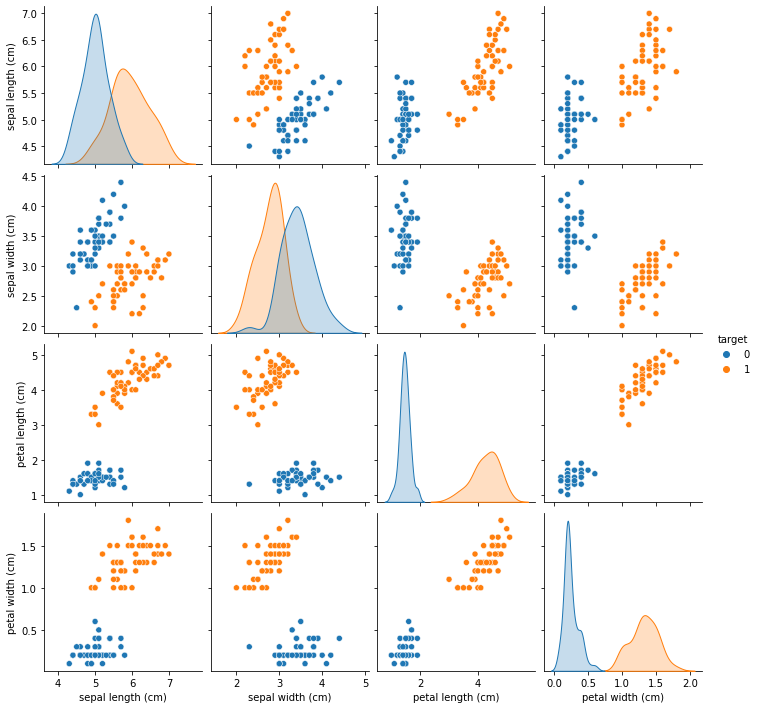

In [82]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

iris = load_iris() #loading the data

df = pd.concat([pd.DataFrame(list(iris.data), columns= iris.feature_names), pd.DataFrame(list(iris.target), columns= ["target"])], axis=1) #building a dataframe from the data so we could use for easier visualization

df = df[df['target'] != 2] # i'm going here for a binomial Model there for im only going the use two of the labels
sns.pairplot(df, hue="target", size=2.5) #Visualizing the data to get a better understanding of its distrubtion and the weights of diffrent features

After we viusalized our data and got a better understanding of what we're working with we can start by constructing the model

In [83]:
inp_df = df.drop(df.columns[[4]], axis=1) #the input for the model
out_df = df.drop(df.columns[[0,1,2,3]], axis=1) #output (the classes)

#for getting X and y we could've easily used X,y = load_iris(return_Xy = True) but since it's easier to visualize the data as a dataframe i just went with it.
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42) #80-20 training the testing ratio
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [84]:
#Now to implement the functions that we would need for the model
def weightInitialization(n_features):
    """This function generates weights based on the number of features and an intercept """
    w = np.zeros((1,n_features))
    b = 0
    return w,b

def sigmoid_activation(result):
    """This would appy the result to a sigmoid function to get the final prediction as mentioned in the explanation before"""
    final_result = 1/(1+np.exp(-result))
    return final_result

def model_optimize(w, b, X, Y):
    """This creates the gradients for w and b as well as the cost of the model"""
    m = X.shape[0]

    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))

    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))

    grads = {"dw": dw, "db": db}

    return grads, cost

def model_predict(w, b, X, Y, learning_rate, no_iterations):
    """Getting the parameters by using Gradient Descent"""
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w,b,X,Y)

        dw = grads["dw"]
        db = grads["db"]

        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)

        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

def predict(final_pred, m):
    """For generating a prediction"""
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [85]:
n_features = X_train.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)

#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_train, y_train, learning_rate=0.0001,no_iterations=4500)

#Final weights and intercept
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)

#Predicting
train_pred = sigmoid_activation(np.dot(w,X_train.T)+b)
test_pred = sigmoid_activation(np.dot(w,X_test.T)+b)

#Model evaluation
m_tr =  X_train.shape[0]
m_ts =  X_test.shape[0]

y_tr_pred = predict(train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_train))
y_ts_pred = predict(test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_test))

Number of Features 4
Optimized weights [[-0.00422604 -0.11833844  0.22200892  0.0918322 ]]
Optimized intercept -0.018033798604236064
Training Accuracy 0.9875
Test Accuracy 1.0


Ploting the cost of the model over time

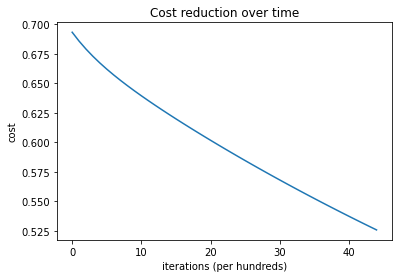

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

#### Logical Regression ith the help of Sklearn since it's the easiest:

In [92]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

#weights and intercept
print('Weights', clf.coef_)
print('Intercept',clf.intercept_)

#prediction
pred = clf.predict(X_test)

#Evaluation
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_test, y_test)))

Weights [[ 0.45808171 -0.83895654  2.21684247  0.92362595]]
Intercept [-6.526665]
Accuracy from sk-learn: 1.0


c:\Users\VIRGA\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
